# Import Library

In [ ]:
!pip install Sastrawi
!pip install nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore')


pd.pandas.set_option('display.max_columns', None)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.2 MB/s eta 0:00:00


In [ ]:
filename = "Aspek Pelayanan Hotel Dprimahotel.csv"
df = pd.read_csv(filename, encoding = 'latin-1')
df.head()

,nama_hotel,nama_pelanggan,rating,ulasan
0,d'primahotel Tangerang,Cindy C. H.,"8,5","Makanan enak seperti hotel bintang 5, cuma ana..."
1,d'primahotel Tangerang,L***a,"9,4",staf hotel sangat ramah memberi kamar sesuai k...
2,d'primahotel Tangerang,Adi P.,10,Terima kasih buat staff hotel Rama Adi dan Din...
3,d'primahotel Tangerang,G***a,10,bagus staff ramah pelayanan oke banget
4,d'primahotel Tangerang,R***a,"9,7",pelayanan staf ramah dan makanannya enak2


In [ ]:
df.drop(columns = ['nama_hotel', 'nama_pelanggan'], inplace = True)
df.columns = ['rating', 'ulasan']
df.head()

,rating,ulasan
0,"8,5","Makanan enak seperti hotel bintang 5, cuma ana..."
1,"9,4",staf hotel sangat ramah memberi kamar sesuai k...
2,10,Terima kasih buat staff hotel Rama Adi dan Din...
3,10,bagus staff ramah pelayanan oke banget
4,"9,7",pelayanan staf ramah dan makanannya enak2


# Preprocessing Data

### Cleaning the text

In [ ]:
import string
import re

In [ ]:
def clean_text(text):
    return re.sub('[^a-zA-Z]', ' ', text).lower()
df['clean_text'] = df['ulasan'].apply(lambda x: clean_text(x))

## Menambahkan fitur tambahan - panjang dan persentase tanda baca dalam teks

In [ ]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100
df['review_len'] = df['ulasan'].apply(lambda x: len(x) - x.count(" "))
df['punct'] = df['ulasan'].apply(lambda x: count_punct(x))
df.head()

,rating,ulasan,clean_text,review_len,punct
0,"8,5","Makanan enak seperti hotel bintang 5, cuma ana...",makanan enak seperti hotel bintang cuma ana...,93,7.5
1,"9,4",staf hotel sangat ramah memberi kamar sesuai k...,staf hotel sangat ramah memberi kamar sesuai k...,74,0.0
2,10,Terima kasih buat staff hotel Rama Adi dan Din...,terima kasih buat staff hotel rama adi dan din...,173,2.9
3,10,bagus staff ramah pelayanan oke banget,bagus staff ramah pelayanan oke banget,33,0.0
4,"9,7",pelayanan staf ramah dan makanannya enak2,pelayanan staf ramah dan makanannya enak,36,0.0


## Tokenization

In [ ]:
import nltk

nltk.download('all')

from nltk.tokenize import word_tokenize

def tokenize_text(text):
    tokens = nltk.tokenize.word_tokenize(text)
    return tokens

df['tokens'] = df['clean_text'].apply(tokenize_text)

df.head()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

,rating,ulasan,clean_text,review_len,punct,tokens
0,"8,5","Makanan enak seperti hotel bintang 5, cuma ana...",makanan enak seperti hotel bintang cuma ana...,93,7.5,"[makanan, enak, seperti, hotel, bintang, cuma,..."
1,"9,4",staf hotel sangat ramah memberi kamar sesuai k...,staf hotel sangat ramah memberi kamar sesuai k...,74,0.0,"[staf, hotel, sangat, ramah, memberi, kamar, s..."
2,10,Terima kasih buat staff hotel Rama Adi dan Din...,terima kasih buat staff hotel rama adi dan din...,173,2.9,"[terima, kasih, buat, staff, hotel, rama, adi,..."
3,10,bagus staff ramah pelayanan oke banget,bagus staff ramah pelayanan oke banget,33,0.0,"[bagus, staff, ramah, pelayanan, oke, banget]"
4,"9,7",pelayanan staf ramah dan makanannya enak2,pelayanan staf ramah dan makanannya enak,36,0.0,"[pelayanan, staf, ramah, dan, makanannya, enak]"


## Stemming and Removing Stopwords

In [ ]:
#Removing Stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()  # Membuat objek stopword remover

def stopword_text(tokens):
    # Gabungkan tokens menjadi sebuah string, lalu hilangkan stopword
    text = ' '.join(tokens)
    cleaned_text = stopword.remove(text)
    # Kembalikan hasilnya menjadi list token
    cleaned_tokens = cleaned_text.split()
    return cleaned_tokens

# Terapkan fungsi untuk menghapus stopwords
df['stopword'] = df['tokens'].apply(stopword_text)
df.head()


,rating,ulasan,clean_text,review_len,punct,tokens,stopword
0,"8,5","Makanan enak seperti hotel bintang 5, cuma ana...",makanan enak seperti hotel bintang cuma ana...,93,7.5,"[makanan, enak, seperti, hotel, bintang, cuma,...","[makanan, enak, hotel, bintang, cuma, anak, di..."
1,"9,4",staf hotel sangat ramah memberi kamar sesuai k...,staf hotel sangat ramah memberi kamar sesuai k...,74,0.0,"[staf, hotel, sangat, ramah, memberi, kamar, s...","[staf, hotel, sangat, ramah, memberi, kamar, s..."
2,10,Terima kasih buat staff hotel Rama Adi dan Din...,terima kasih buat staff hotel rama adi dan din...,173,2.9,"[terima, kasih, buat, staff, hotel, rama, adi,...","[terima, kasih, buat, staff, hotel, rama, adi,..."
3,10,bagus staff ramah pelayanan oke banget,bagus staff ramah pelayanan oke banget,33,0.0,"[bagus, staff, ramah, pelayanan, oke, banget]","[bagus, staff, ramah, pelayanan, oke, banget]"
4,"9,7",pelayanan staf ramah dan makanannya enak2,pelayanan staf ramah dan makanannya enak,36,0.0,"[pelayanan, staf, ramah, dan, makanannya, enak]","[pelayanan, staf, ramah, makanannya, enak]"


In [ ]:
# Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Membuat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi stemming
def stemming_text(tokens):
    # Lakukan stemming pada setiap token dan gabungkan kembali dengan spasi
    return ' '.join([stemmer.stem(token) for token in tokens])

# Menerapkan fungsi stemming
df['ulasan_stemming'] = df['stopword'].apply(stemming_text)
df.head()

,rating,ulasan,clean_text,review_len,punct,tokens,stopword,ulasan_stemming
0,"8,5","Makanan enak seperti hotel bintang 5, cuma ana...",makanan enak seperti hotel bintang cuma ana...,93,7.5,"[makanan, enak, seperti, hotel, bintang, cuma,...","[makanan, enak, hotel, bintang, cuma, anak, di...",makan enak hotel bintang cuma anak minta bayar...
1,"9,4",staf hotel sangat ramah memberi kamar sesuai k...,staf hotel sangat ramah memberi kamar sesuai k...,74,0.0,"[staf, hotel, sangat, ramah, memberi, kamar, s...","[staf, hotel, sangat, ramah, memberi, kamar, s...",staf hotel sangat ramah beri kamar sesuai ingi...
2,10,Terima kasih buat staff hotel Rama Adi dan Din...,terima kasih buat staff hotel rama adi dan din...,173,2.9,"[terima, kasih, buat, staff, hotel, rama, adi,...","[terima, kasih, buat, staff, hotel, rama, adi,...",terima kasih buat staff hotel rama adi dinni b...
3,10,bagus staff ramah pelayanan oke banget,bagus staff ramah pelayanan oke banget,33,0.0,"[bagus, staff, ramah, pelayanan, oke, banget]","[bagus, staff, ramah, pelayanan, oke, banget]",bagus staff ramah layan oke banget
4,"9,7",pelayanan staf ramah dan makanannya enak2,pelayanan staf ramah dan makanannya enak,36,0.0,"[pelayanan, staf, ramah, dan, makanannya, enak]","[pelayanan, staf, ramah, makanannya, enak]",layan staf ramah makan enak


In [ ]:
# 1. Baca kamus lexicon positif dan negatif dengan bobotnya
df_positive = pd.read_csv("positive.tsv", sep="\t", header=None, names=["word", "weight"])
df_negative = pd.read_csv("negative.tsv", sep="\t", header=None, names=["word", "weight"])

# Lewati baris pertama (header) saat membuat kamus
lexicon_positive = dict(zip(df_positive["word"][1:], df_positive["weight"][1:].astype(int)))
lexicon_negative = dict(zip(df_negative["word"][1:], df_negative["weight"][1:].astype(int)))

# 2. Fungsi Menentukan Sentimen dengan Bobot
def determine_sentiment(text):
    score = 0
    words = text.split()  # Memecah teks menjadi kata-kata

    for word in words:
        if word in lexicon_positive:
            score += lexicon_positive[word]  # Tambahkan bobot positif
        elif word in lexicon_negative:
            score += lexicon_negative[word]  # Tambahkan bobot negatif

    # 3. Menentukan Label Sentimen Positif & Negatif
    if score > 0:
        return "1"  # Positif
    elif score < 0:
        return "0"  # Negatif
    else:
        return None  # Tidak ada label jika skor 0

# 4. Terapkan ke DataFrame Ulasan
df['label'] = df['ulasan_stemming'].apply(determine_sentiment)

# Menampilkan hasil dengan label yang telah ditentukan
df.head()

,rating,ulasan,clean_text,review_len,punct,tokens,stopword,ulasan_stemming,label
0,"8,5","Makanan enak seperti hotel bintang 5, cuma ana...",makanan enak seperti hotel bintang cuma ana...,93,7.5,"[makanan, enak, seperti, hotel, bintang, cuma,...","[makanan, enak, hotel, bintang, cuma, anak, di...",makan enak hotel bintang cuma anak minta bayar...,1
1,"9,4",staf hotel sangat ramah memberi kamar sesuai k...,staf hotel sangat ramah memberi kamar sesuai k...,74,0.0,"[staf, hotel, sangat, ramah, memberi, kamar, s...","[staf, hotel, sangat, ramah, memberi, kamar, s...",staf hotel sangat ramah beri kamar sesuai ingi...,1
2,10,Terima kasih buat staff hotel Rama Adi dan Din...,terima kasih buat staff hotel rama adi dan din...,173,2.9,"[terima, kasih, buat, staff, hotel, rama, adi,...","[terima, kasih, buat, staff, hotel, rama, adi,...",terima kasih buat staff hotel rama adi dinni b...,1
3,10,bagus staff ramah pelayanan oke banget,bagus staff ramah pelayanan oke banget,33,0.0,"[bagus, staff, ramah, pelayanan, oke, banget]","[bagus, staff, ramah, pelayanan, oke, banget]",bagus staff ramah layan oke banget,1
4,"9,7",pelayanan staf ramah dan makanannya enak2,pelayanan staf ramah dan makanannya enak,36,0.0,"[pelayanan, staf, ramah, dan, makanannya, enak]","[pelayanan, staf, ramah, makanannya, enak]",layan staf ramah makan enak,1


# Exploratory Data Analysis (EDA)

Number of null in rating: 0
Number of null in ulasan: 0
Number of null in label: 14
Number of null in rating after handling: 0
Number of null in ulasan after handling: 0
Number of null in label after handling: 0


<Axes: xlabel='label', ylabel='count'>

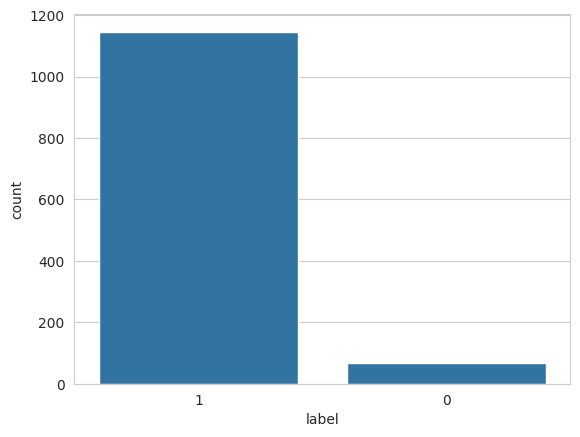

In [ ]:
# Menampilkan jumlah nilai kosong (null) di setiap kolom
print(f"Number of null in rating: { df['rating'].isnull().sum() }")
print(f"Number of null in ulasan: { df['ulasan'].isnull().sum() }")
print(f"Number of null in label: { df['label'].isnull().sum() }")

# Menghapus baris yang memiliki nilai kosong di kolom 'label'
df = df.dropna(subset=['label'])

# Menampilkan jumlah nilai kosong setelah penghapusan
print(f"Number of null in rating after handling: { df['rating'].isnull().sum() }")
print(f"Number of null in ulasan after handling: { df['ulasan'].isnull().sum() }")
print(f"Number of null in label after handling: { df['label'].isnull().sum() }")

# Visualisasi distribusi label setelah penanganan nilai kosong
sns.countplot(x='label', data=df)


label positif (1) = 1146 rows
label negatif (0) = 67 rows


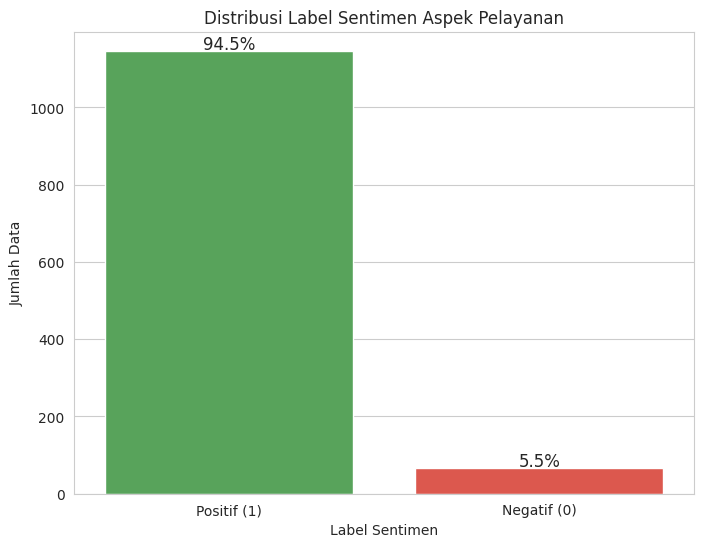

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung total data
total_data = len(df)

print(f"label positif (1) = {len(df[df['label']=='1'])} rows")
print(f"label negatif (0) = {len(df[df['label']=='0'])} rows")

# Hitung jumlah per label
label_counts = df['label'].value_counts()

# Hitung persentase
percentages = (label_counts / total_data) * 100

# Siapkan data
labels = ['Positif (1)', 'Negatif (0)']
colors = ['#4CAF50', '#F44336']
values = [label_counts['1'], label_counts['0']]
percent_labels = [percentages['1'], percentages['0']]

# Plot
plt.figure(figsize=(8, 6))
bars = sns.barplot(x=labels, y=values, palette=colors)

# Tambahkan persentase di atas bar
for i, (count, percent) in enumerate(zip(values, percent_labels)):
    plt.text(i, count + 5, f"{percent:.1f}%", ha='center', fontsize=12)

plt.title('Distribusi Label Sentimen Aspek Pelayanan')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah Data')
plt.ylim(0, max(values) + 50)
plt.show()


# Visualizating Wordcloud

In [ ]:
from wordcloud import WordCloud

In [ ]:

df_positive = df[df['label'] == '1']  # Filter untuk ulasan positif (label '1')
df_negative = df[df['label'] == '0']   # Filter untuk ulasan netral (label '0')

# Convert to list
negative_list = df_negative['ulasan_stemming'].tolist()
positive_list = df_positive['ulasan_stemming'].tolist()



filtered_negative = ("").join(str(negative_list))  # Ubah list menjadi string
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list))  # Ubah list menjadi string
filtered_positive = filtered_positive.lower()



## Word Cloud: Ulasan Positif

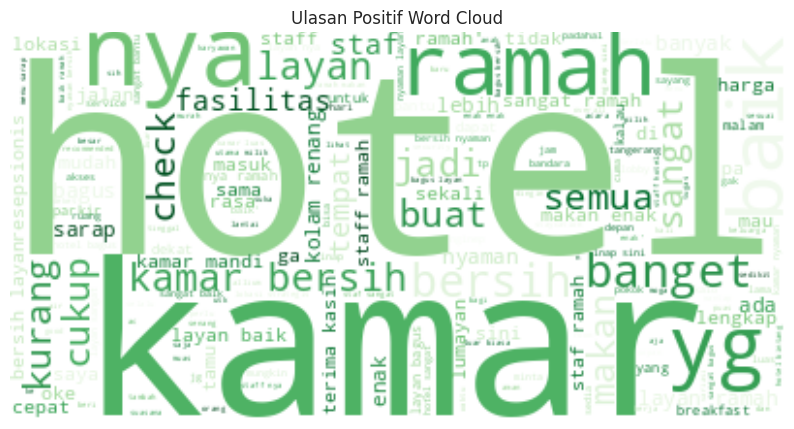

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Ulasan Positif Word Cloud")
plt.show()

## Word Colud: Ulasan Negatif

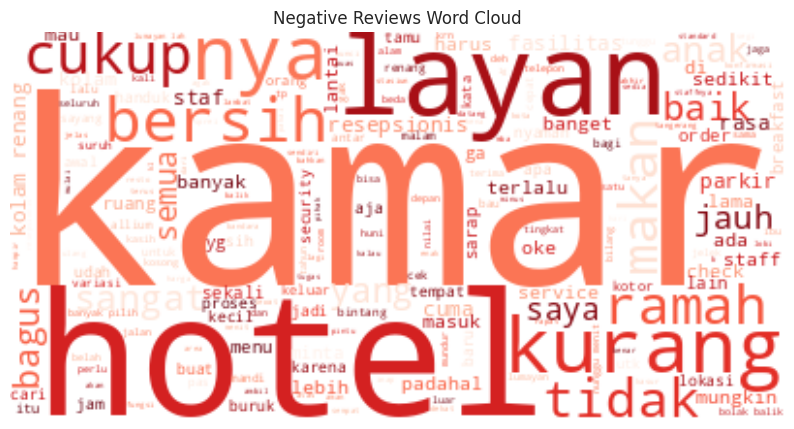

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()

# Ekstraksi Fitur dari Teks

*   Vectorizer : TF-IDF




In [ ]:
X = df[['ulasan_stemming', 'review_len', 'punct']]
y = df['label']
print(X.shape)
print(y.shape)

(1213, 3)
(1213,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(970, 3)
(243, 3)
(970,)
(243,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2, ngram_range=(1,2)) # abaikan istilah yang muncul di lebih dari 50% dokumen dan yang muncul kurang dari 2% dokumen
tfidf_train = tfidf.fit_transform(X_train['ulasan_stemming'])
tfidf_test = tfidf.transform(X_test['ulasan_stemming'])

X_train_vect = pd.concat([X_train[['review_len', 'punct']].reset_index(drop=True),
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['review_len', 'punct']].reset_index(drop=True),
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head(5)

review_len  punct         0    1    2    3    4    5    6    7    8    9  \
0         814    0.9  0.162591  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1          83    4.8  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2         549    3.8  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3          75    1.3  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4         112    2.7  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    10   11   12   13   14   15   16   17   18   19   20   21   22   23  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

         24   25   26   27   28   29   30   31   32   33        34   35   36  \
0  0.084898  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.054134  0.0  0.0   
1  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
2  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
3  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
4  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   

    37   38   39   40   41   42   43   44        45   46   47   48        49  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.051268  0.0  0.0  0.0  0.084898   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000   

    50   51        52   53   54   55   56   57   58   59   60   61   62   63  \
0  0.0  0.0  0.071141  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    64   65   66   67   68   69   70   71   72   73   74   75   76   77   78  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    79   80   81   82   83   84   85   86        87   88   89   90   91   92  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.280647  0.0  0.0  0.0  0.0  0.0   

    93   94   95   96   97   98   99  100  101  102  103  104  105       106  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.099525   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   

        107  108  109       110  111  112  113  114  115  116  117  118  119  \
0  0.000000  0.0  0.0  0.084898  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.000000  0.0  0.0  0.000000

In [ ]:
from collections import Counter
print("Distribusi Label Data Training:", Counter(y_train))

Distribusi Label Data Training: Counter({'1': 916, '0': 54})


In [ ]:
print("Distribusi Label Data Testing:", Counter(y_test))

Distribusi Label Data Testing: Counter({'1': 230, '0': 13})


# Visualize Confusion Matrix

*   Vectorizer : TF-IDF




In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Support Vector Machine

              precision    recall  f1-score   support

           0       0.50      0.23      0.32        13
           1       0.96      0.99      0.97       230

    accuracy                           0.95       243
   macro avg       0.73      0.61      0.64       243
weighted avg       0.93      0.95      0.94       243



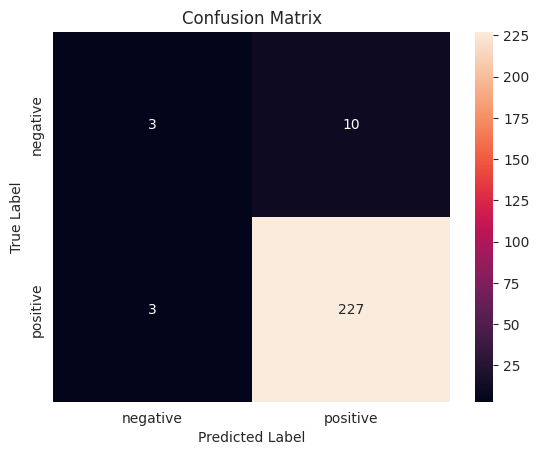

In [ ]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', C=5)

X_train_vect.columns = X_train_vect.columns.astype(str)
X_test_vect.columns = X_test_vect.columns.astype(str)

classifier.fit(X_train_vect, y_train)
svm_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()